In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the file
dataset = pd.read_csv('Python data final.csv')
dataset

,Stream,Current Degree,10th%,12th%,UG%,Backlog,Work Experience,Placement Status
0,Science,BSc,100.0,70.0,71.00,No,No,Placed
1,Arts,BA,100.0,86.0,72.00,No,No,Placed
2,Arts,BA,100.0,86.0,73.00,Yes,No,Not Placed
3,Arts,BA,100.0,89.4,77.33,No,No,Placed
4,Science,BSc,100.0,93.0,66.67,No,Yes,Placed
...,...,...,...,...,...,...,...,...
981,Professional,BVoc,53.2,61.0,70.00,Yes,Yes,Not Placed
982,Professional,BVoc,53.0,51.0,55.00,Yes,No,Not Placed
983,Commerce,BCom,53.0,84.0,65.00,Yes,No,Not Placed
984,Professional,BVoc,51.0,61.0,70.00,Yes,No,Not Placed


In [3]:
# dropping the stream column
dataset = dataset.drop('Stream', axis=1)
dataset

,Current Degree,10th%,12th%,UG%,Backlog,Work Experience,Placement Status
0,BSc,100.0,70.0,71.00,No,No,Placed
1,BA,100.0,86.0,72.00,No,No,Placed
2,BA,100.0,86.0,73.00,Yes,No,Not Placed
3,BA,100.0,89.4,77.33,No,No,Placed
4,BSc,100.0,93.0,66.67,No,Yes,Placed
...,...,...,...,...,...,...,...
981,BVoc,53.2,61.0,70.00,Yes,Yes,Not Placed
982,BVoc,53.0,51.0,55.00,Yes,No,Not Placed
983,BCom,53.0,84.0,65.00,Yes,No,Not Placed
984,BVoc,51.0,61.0,70.00,Yes,No,Not Placed


In [4]:
# catgorising col for further labelling
dataset["Current Degree"] = dataset["Current Degree"].astype('category')
dataset["Backlog"] = dataset["Backlog"].astype('category')
dataset[" Work Experience "] = dataset[" Work Experience "].astype('category')
dataset["Placement Status"] = dataset["Placement Status"].astype('category')
dataset.dtypes

Current Degree       category
10th%                 float64
12th%                 float64
UG%                   float64
Backlog              category
 Work Experience     category
Placement Status     category
dtype: object

In [5]:
# labelling the columns
dataset["Current Degree"] = dataset["Current Degree"].cat.codes
dataset["Backlog"] = dataset["Backlog"].cat.codes
dataset[" Work Experience "] = dataset[" Work Experience "].cat.codes
dataset["Placement Status"] = dataset["Placement Status"].cat.codes
dataset

,Current Degree,10th%,12th%,UG%,Backlog,Work Experience,Placement Status
0,5,100.0,70.0,71.00,0,0,1
1,0,100.0,86.0,72.00,0,0,1
2,0,100.0,86.0,73.00,1,0,0
3,0,100.0,89.4,77.33,0,0,1
4,5,100.0,93.0,66.67,0,1,1
...,...,...,...,...,...,...,...
981,7,53.2,61.0,70.00,1,1,0
982,7,53.0,51.0,55.00,1,0,0
983,3,53.0,84.0,65.00,1,0,0
984,7,51.0,61.0,70.00,1,0,0


In [6]:
# selecting the features and labels
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
 
# display dependent & independent variables
Y
X

array([[  5., 100.,  70.,  71.,   0.,   0.],
       [  0., 100.,  86.,  72.,   0.,   0.],
       [  0., 100.,  86.,  73.,   1.,   0.],
       ...,
       [  3.,  53.,  84.,  65.,   1.,   0.],
       [  7.,  51.,  61.,  70.,   1.,   0.],
       [  0.,  50.,  55.,  75.,   0.,   0.]])

In [33]:
# dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)
 
# display dataset
dataset.head()

,Current Degree,10th%,12th%,UG%,Backlog,Work Experience,Placement Status
0,5,100.0,70.0,71.00,0,0,1
1,0,100.0,86.0,72.00,0,0,1
2,0,100.0,86.0,73.00,1,0,0
3,0,100.0,89.4,77.33,0,0,1
4,5,100.0,93.0,66.67,0,1,1


# Knn Model to Predict Placement Accuracy.

In [34]:

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

In [35]:
training_accuracy=[]
test_accuracy=[]

neighbors=range(1,100)

for number_of_neighbors in neighbors:
    KNN=KNeighborsClassifier(n_neighbors=number_of_neighbors)
    KNN.fit(X_train,Y_train)
    training_accuracy.append(KNN.score(X_train,Y_train))
    test_accuracy.append(KNN.score(X_test,Y_test))
    
 

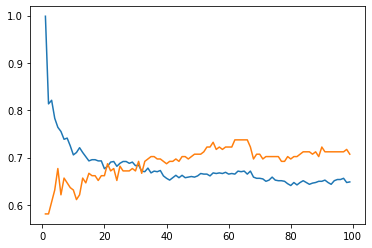

In [36]:
# Plot calculated accuracy levels

plt.plot(neighbors,training_accuracy,label="training accuracy")
plt.plot(neighbors,test_accuracy,label="test accuracy")

In [45]:
Knn=KNeighborsClassifier(n_neighbors=65)

In [46]:

Knn.fit(X_train, Y_train)
 
# Calculate the accuracy of the model
print(Knn.score(X_test, Y_test))

0.7373737373737373


In [47]:
# creating a Y_pred for test data
Y_pred = Knn.predict(X_test)
 
# display predicted values
Y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int8)

In [48]:
# evaluation of the classifier
from sklearn.metrics import confusion_matrix, accuracy_score

# display confusion matrix
print(confusion_matrix(Y_test, Y_pred))

# display accuracy
print(accuracy_score(Y_test, Y_pred))

[[76 24]
 [28 70]]
0.7373737373737373
